In [1]:
cd ..

/Users/kimyoungh/GoogleDrive/rich/main/rich


In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from data_processing.trading_sequence_generator import TradingSequenceGenerator
from trading.kis_data_loader import KISDataLoader

%load_ext autoreload
%autoreload 2

In [3]:
loader = KISDataLoader()

In [6]:
k200 = loader.get_timeseries(
    '069500', start_date='20041230',
    end_date='20230210', period='D')

In [7]:
k200

,open,high,low,close,volume,turnover
stck_bsop_date,,,,,,
20041230,8373.0,8555.0,8373.0,8555.0,2236441.0,1.896828e+10
20050103,8555.0,8585.0,8475.0,8534.0,1291371.0,1.100016e+10
20050104,8475.0,8555.0,8475.0,8490.0,674618.0,5.744800e+09
20050105,8446.0,8490.0,8373.0,8490.0,1231892.0,1.039094e+10
20050106,8468.0,8497.0,8395.0,8410.0,901656.0,7.610162e+09
...,...,...,...,...,...,...
20230206,32695.0,32780.0,32240.0,32240.0,9254976.0,3.003067e+11
20230207,32265.0,32540.0,32190.0,32440.0,5380254.0,1.745932e+11
20230208,32645.0,33050.0,32640.0,32945.0,7531065.0,2.480989e+11


In [5]:
k200 = k200.rename(columns={'turnover': 'value'})

In [7]:
tsg = TradingSequenceGenerator(k200,
                            window=250, trading_period=20,
                            fee=0.01, decay=0.99, window_fwd=5)

In [8]:
dataset = tsg.generate_overall_dataset(
    pick_num=4, sample_num=10, temp=100, rn_calc=False)

best done!


In [9]:
dataset['observations'].shape

(4194, 20, 8)

In [10]:
dataset['action_series'].shape

(4194, 10, 20)

In [11]:
dataset['rets_series'].shape

(4194, 10, 20)

In [12]:
dataset.keys()

dict_keys(['action_series', 'rets_series', 'rew_series', 'val_series', 'updown_series', 'date_series', 'observations'])

In [13]:
for key, data in dataset.items():
    print(key, data.shape)

action_series (4194, 10, 20)
rets_series (4194, 10, 20)
rew_series (4194, 10, 20)
val_series (4194, 10, 20)
updown_series (4194, 20)
date_series (4194,)
observations (4194, 20, 8)


In [14]:
dataset['updown_series']

array([[1, 1, 1, ..., 1, 1, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1]])

<AxesSubplot:>

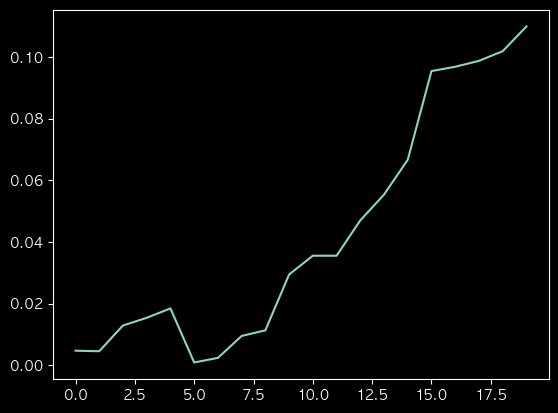

In [15]:
((1 + pd.Series(dataset['rets_series'][-2][8])).cumprod() - 1).plot()

In [16]:
dataset['action_series'][-100]

array([[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0]])

In [17]:
dataset['rew_series'][-10][0]

array([ 1,  1,  0,  1, -2,  1,  1,  1,  1, -2,  1,  1,  1, -2,  1,  1,  1,
        1,  1,  0])

In [18]:
for i in range(dataset['rets_series'].shape[0]):
    r = (1 + pd.Series(dataset['rets_series'][i][0])).cumprod() - 1
    print(r.iloc[-1])

0.15506110643091775
0.1542957646384242
0.13169349112367712
0.13971380515440313
0.15003494372895254
0.08709765681214754
0.10916147092357598
0.184105382613442
0.11572641955599261
0.1925325916994045
0.14015099909314466
0.19134970919494165
0.1967886002967174
0.17207117561056862
0.19433001529685434
0.20177659280492954
0.14604350968827506
0.12135277471411055
0.13825808128367312
0.11510673047254638
0.11292474013303178
0.12339222964658036
0.11852097867480849
0.1407899282025482
0.11562054502978225
0.12599625198727926
0.10511920277898668
0.10741957890575837
0.0782002019642698
0.1027018038972618
0.06498961037034356
0.07062008704171552
0.053070228999424485
0.07352429182692322
0.08282227163224509
0.05755690784590817
0.08033860832905382
0.08586429209711155
0.06988089370531192
0.04502200576821069
0.05765995697128523
0.09425994072506994
0.08695879948103724
0.08795160309171068
0.05245359950498085
0.034337629594420216
0.056047197640117785
0.053515072168560884
0.05554497211896514
0.062239151450497854
0.0

In [19]:
for key, data in dataset.items():
    print(key, data.shape)

action_series (4194, 10, 20)
rets_series (4194, 10, 20)
rew_series (4194, 10, 20)
val_series (4194, 10, 20)
updown_series (4194, 20)
date_series (4194,)
observations (4194, 20, 8)


In [20]:
dataset['action_series'][-5:, 0]

array([[0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [21]:
dataset['date_series']

array(['20051229', '20060102', '20060103', ..., '20221214', '20221215',
       '20221216'], dtype=object)

In [22]:
dataset['rew_series']

array([[[ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1, -2, ...,  1,  1,  1],
        ...,
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1]],

       [[ 1,  1, -2, ...,  1,  1,  1],
        [ 1,  1, -2, ...,  1,  1,  1],
        [ 1, -2,  1, ...,  1,  1,  1],
        ...,
        [ 1,  1, -2, ...,  1,  1,  1],
        [ 1,  1, -2, ...,  1,  1,  1],
        [ 1,  1, -2, ...,  1,  1,  1]],

       [[-2,  1,  1, ...,  1,  1,  1],
        [ 1, -2, -2, ...,  1,  1,  1],
        [-2,  1, -2, ...,  1,  1,  1],
        ...,
        [ 1, -2, -2, ...,  1,  1,  1],
        [ 1, -2, -2, ...,  1,  1,  1],
        [ 1, -2,  1, ...,  1,  1,  1]],

       ...,

       [[ 1,  1, -2, ...,  1,  1,  1],
        [ 1,  1, -2, ...,  1,  1,  1],
        [ 1,  1, -2, ...,  1,  1,  1],
        ...,
        [ 1,  1, -2, ...,  1,  1,  1],
        [ 1,  1, -2, ...,  1,  1,  1],
        [ 1,  1, -2, ...,  1,  1

In [23]:
dataset['updown_series']

array([[1, 1, 1, ..., 1, 1, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1]])

In [36]:
k200.to_parquet('train_data/trading_bc_transformer/price_train_k200.pq')

In [37]:
with open('train_data/trading_bc_transformer/train_dataset_20_k200.pkl', 'wb') as f:
    pickle.dump(dataset, f)